# Performance of Classifier Models on Detecting Fraudulent Job Postings Using TF-IDF Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
emscad = pd.read_csv("EMSCAD_Job_postings.csv")
emscad.head(10)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,f,f
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"<p>Founded in 2009, the <b>Fonpit AG</b> rose ...",<p><b>Your Responsibilities:</b></p>\r\n<p> </...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<u...,f,t,t,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,f,f
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,<p>Airenvy’s mission is to provide lucrative y...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b> You'll be able to e...,f,t,t,NaN,NaN,NaN,NaN,NaN,f,f
8,HP BSM SME,"US, FL, Pensacola",NaN,NaN,<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,NaN,f,t,t,Full-time,Associate,NaN,Information Technology and Services,NaN,f,f
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,NaN,f,t,f,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,f,f


In [3]:
emscad.fillna('', inplace=True)
emscad

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,f,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,f,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,,f,f,f,Full-time,,,,,f,f
17878,Graphic Designer,"NG, LA, Lagos",,,,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


<BarContainer object of 2 artists>

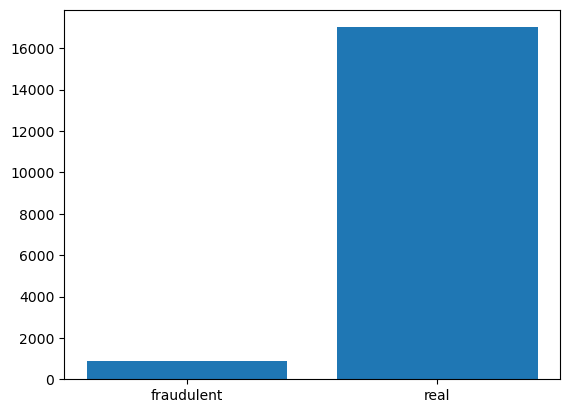

In [4]:
import matplotlib.pyplot as plt
labels = ['fraudulent', 'real']
bar = [len(emscad[emscad['fraudulent'] == 't']), len(emscad[emscad['fraudulent'] == 'f'])]
plt.bar(labels, bar)

In [5]:
corpus = emscad['description'] + str(" ") + emscad['company_profile'] + str(" ") + emscad['requirements'] + str(" ") + emscad['benefits']
emscad['description'] = corpus
jobs = emscad[['title', 'description', 'fraudulent']]
jobs

,title,description,fraudulent
0,Marketing Intern,"<p>Food52, a fast-growing, James Beard Award-w...",f
1,Customer Service - Cloud Video Production,<p>Organised - Focused - Vibrant - Awesome!<br...,f
2,Commissioning Machinery Assistant (CMA),"<p>Our client, located in Houston, is actively...",f
3,Account Executive - Washington DC,<p><b>THE COMPANY: ESRI – Environmental System...,f
4,Bill Review Manager,<p><b>JOB TITLE:</b> Itemization Review Manage...,f
...,...,...,...
17875,Account Director - Distribution,<p>Just in case this is the first time you’ve ...,f
17876,Payroll Accountant,<p></p>\r\n<p>The Payroll Accountant will focu...,f
17877,Project Cost Control Staff Engineer - Cost Con...,<p>Experienced Project Cost Control Staff Engi...,f
17878,Graphic Designer,<p>Nemsia Studios is looking for an experience...,f


In [6]:
import re

def remove_html_tags(text):
    """Remove html tags from a string"""
    
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def remove_url(text):
    """Remove url links from a string"""
    
    clean = re.compile('#.*?#')
    return re.sub(clean, '', text)

def remove_r(text):
    """Remove \r\ from a string"""
    
    clean = re.compile("\r\n")
    return re.sub(clean, '  ', text)

In [7]:
cleaned_corpus = corpus.apply(remove_html_tags).apply(remove_url).apply(remove_r)
cleaned_corpus

0        Food52, a fast-growing, James Beard Award-winn...
1        Organised - Focused - Vibrant - Awesome!Do you...
2        Our client, located in Houston, is actively se...
3        THE COMPANY: ESRI – Environmental Systems Rese...
4        JOB TITLE: Itemization Review Manager  LOCATIO...
                               ...                        
17875    Just in case this is the first time you’ve vis...
17876      The Payroll Accountant will focus primarily ...
17877    Experienced Project Cost Control Staff Enginee...
17878    Nemsia Studios is looking for an experienced v...
17879    Who are we?  Vend is an award winning web base...
Length: 17880, dtype: object

In [8]:
jobs.insert(2, "corpus", cleaned_corpus , True)

In [9]:
jobs['fraudulent'] = jobs['fraudulent'].replace('f', 0).replace('t', 1)



/var/folders/3r/5j75n2sd0wd0c7tn14c1jyg80000gn/T/ipykernel_49154/1604672206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['fraudulent'] = jobs['fraudulent'].replace('f', 0).replace('t', 1)


In [10]:
job = jobs[['title', 'corpus', 'fraudulent']]
fraudulent = job[job['fraudulent']==1]
real = job[job['fraudulent']==0].sample(len(fraudulent))
df = real.append(fraudulent)
df

/var/folders/3r/5j75n2sd0wd0c7tn14c1jyg80000gn/T/ipykernel_49154/2832943853.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = real.append(fraudulent)


,title,corpus,fraudulent
9996,Support Specialist,"United Cerebral Palsy (UCP) is a unique, empow...",0
8046,"Senior Software Engineers, C++ for AUTOMOTIVE",Software Competitiveness International (SOFT C...,0
16317,IT Security Analyst,(We have more than 1500+ Job openings in our w...,0
8879,Risk Supervisor,"Tidewater Finance Company, an industry leader ...",0
6317,Director of Sales,ConsumerTrack is a rapidly growing internet ma...,0
...,...,...,...
17827,Student Positions Part-Time and Full-Time.,Student Positions Part-Time and Full-Time.You ...,1
17828,Sales Associate,LEARN TO EARN AN EXECUTIVE LEVEL INCOME FULL ...,1
17829,Android Developer,inFullMobile Sp. z o.o. is a mobile software d...,1
17830,Payroll Clerk,JOB DESCRIPTIONWe are seeking a full time payr...,1


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
values = tfidf.fit_transform(df['corpus'])
values

<1732x17077 sparse matrix of type '<class 'numpy.float64'>'
	with 327175 stored elements in Compressed Sparse Row format>

In [13]:
final = pd.DataFrame(values.toarray(), columns = tfidf.get_feature_names_out())
final

,00,000,0001pt,000gbp,000overview,000per,006,00am,00duration,00gbp,...,χώρες,χώρου,ως,όλο,όμιλο,όπου,όπως,όρους,ότι,όχι
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
final[['skills','job','data','science', 'analysis']]

,skills,job,data,science,analysis
0,0.000000,0.036332,0.000000,0.000000,0.000000
1,0.065622,0.018012,0.000000,0.031993,0.028864
2,0.000000,0.098138,0.056586,0.000000,0.078634
3,0.033688,0.000000,0.026657,0.000000,0.000000
4,0.009913,0.013605,0.000000,0.000000,0.000000
...,...,...,...,...,...
1727,0.000000,0.000000,0.000000,0.000000,0.000000
1728,0.000000,0.000000,0.000000,0.000000,0.000000
1729,0.000000,0.000000,0.000000,0.000000,0.000000
1730,0.039227,0.107668,0.000000,0.000000,0.000000


In [14]:
df['fraudulent']

9996     0
8046     0
16317    0
8879     0
6317     0
        ..
17827    1
17828    1
17829    1
17830    1
17831    1
Name: fraudulent, Length: 1732, dtype: int64

In [15]:
X = final
y = df['fraudulent']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier()  
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, rf_y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, rf_y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, rf_y_pred))

ACCURACY OF THE MODEL:  0.9019230769230769
PRECISION OF THE MODEL:  0.9038461538461539
RECALL OF THE MODEL:  0.9003831417624522


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, lr_y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, lr_y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, lr_y_pred))

ACCURACY OF THE MODEL:  0.8788461538461538
PRECISION OF THE MODEL:  0.8837209302325582
RECALL OF THE MODEL:  0.8735632183908046


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, knn_y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, knn_y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, knn_y_pred))

ACCURACY OF THE MODEL:  0.8057692307692308
PRECISION OF THE MODEL:  0.7547770700636943
RECALL OF THE MODEL:  0.9080459770114943


In [20]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, svc_y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, svc_y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, svc_y_pred))

ACCURACY OF THE MODEL:  0.9038461538461539
PRECISION OF THE MODEL:  0.9011406844106464
RECALL OF THE MODEL:  0.9080459770114943


In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, nb_y_pred))
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, nb_y_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, nb_y_pred))

ACCURACY OF THE MODEL:  0.8673076923076923
PRECISION OF THE MODEL:  0.9324324324324325
RECALL OF THE MODEL:  0.7931034482758621


In [22]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf, X, y, cv=5)
lr_scores = cross_val_score(lr, X, y, cv=5)
knn_scores = cross_val_score(knn, X, y, cv=5)
svc_scores = cross_val_score(svc, X, y, cv=5)
nb_scores = cross_val_score(nb, X, y, cv=5)
print("K-fold - RF: ", rf_scores.mean())
print("K-fold - LR: ", lr_scores.mean())
print("K-fold - KNN: ", knn_scores.mean())
print("K-fold - SVC: ", svc_scores.mean())
print("K-fold -  NB: ", nb_scores.mean())

K-fold - RF:  0.9012793390081791
K-fold - LR:  0.8729673002282154
K-fold - KNN:  0.828543585813996
K-fold - SVC:  0.9070446935749862
K-fold -  NB:  0.8723909313521346


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_y_pred))
print(classification_report(y_test, lr_y_pred))
print(classification_report(y_test, knn_y_pred))
print(classification_report(y_test, svc_y_pred))
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       259
           1       0.90      0.90      0.90       261

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       259
           1       0.88      0.87      0.88       261

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       259
           1       0.75      0.91      0.82       261

    accuracy                           0.81       520
   macro avg       0.82      0.81      0.80       520
weighted avg       0.82      0.81      0.80       520

              preci

In [ ]:
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       272
           1       0.91      0.93      0.92       248

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520



In [27]:
from sklearn.preprocessing import MinMaxScaler

data = np.array(final['skills'])


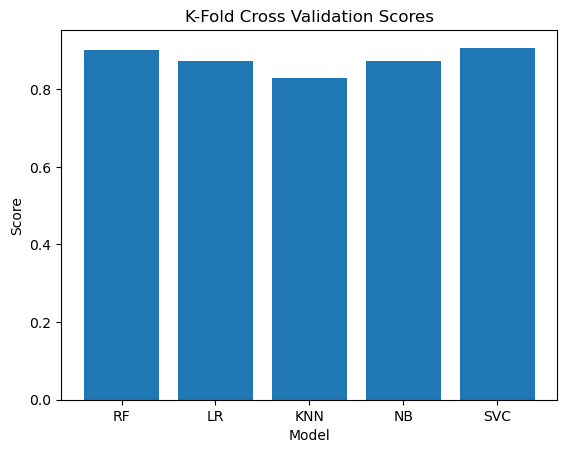

In [40]:
k_scores = [rf_scores.mean(), lr_scores.mean(), knn_scores.mean(), nb_scores.mean(), svc_scores.mean()]
k_labels = ['RF', 'LR', 'KNN', 'NB', 'SVC']

plt.bar(k_labels, k_scores)
plt.title("K-Fold Cross Validation Scores")
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()